In [33]:
import csv
import pandas as pd
import re
import json
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.stats as stats
from scipy import stats
from pandas.tools import plotting

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
#csv
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# 1. Business Questions

1. What are customers talking about?
2. What is the Sentiment of applebees on twitter?
3. What is the Applebees Twitter handle talking about?

# 2. Data Collection

In [34]:
data = []

for line in open('twitterdataguitar.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

print(len(data))

330


In [35]:
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets)

330

In [36]:
ids = [T['id_str'] for T in tweets]
times = [T['created_at'] for T in tweets]
texts = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]
followers_count = [T['user']['followers_count'] for T in tweets]
friends_count = [T['user']['friends_count'] for T in tweets]
names = [T['user']['name'] for T in tweets]
lats = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets]
lons = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets]
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets]

# open an output csv file to write to
out = open('tweetdata335.csv', 'w', encoding='UTF-8', newline='')

# write the header of our CSV as its first line
out.write('id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type\n')

# merge each individual list into a single list using the zip function
rows = list(zip(ids, times, texts, screen_names, followers_count, friends_count, names, lats, lons, place_names, place_types))

# use the writer module on our csv file
csv = csv.writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [value for value in row]
    #values = [(value.encode('utf8') if hasattr(value, 'encode') else value) for value in row]
    csv.writerow(values)

# close our csv file when done
out.close()


In [37]:
df0 = pd.read_csv("tweetdata335.csv")
df0.head()

,id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type
0,1124046328105926657,Thu May 02 20:21:43 +0000 2019,https://t.co/LppuTlragj,occidentalpride,36,241,Wesley Carvalho,NaN,NaN,NaN,NaN
1,1124046352273616897,Thu May 02 20:21:48 +0000 2019,"Hoptille : 2 daders : 1 blnke jongen, zwrte pe...",Angelin84863116,43,227,Angelina,NaN,NaN,NaN,NaN
2,1124046378085289992,Thu May 02 20:21:54 +0000 2019,"RT @marialves53: Deb Gibson, Canadian Artist h...",susanaberasturi,1969,4965,Susana Aberasturi,NaN,NaN,NaN,NaN
3,1124046387853836288,Thu May 02 20:21:57 +0000 2019,RT @ARTamherstburg: Help Wanted- Gibson Galler...,RTT_Amherstburg,1992,1172,River Town Times,NaN,NaN,NaN,NaN
4,1124046426214948865,Thu May 02 20:22:06 +0000 2019,RT @NWStornado: Tornado Warning including Gibs...,JacobRousseau7,10,22,JR Weather ⚡️🌪💦,NaN,NaN,NaN,NaN


In [161]:
df = pd.read_csv("data/sample_tweets.csv")
df.head()

,user,Unnamed: 1,time,tweets
0,applebees,1.102250e+18,3/3/2019 16:34,@YFan914 We're sorry to hear this. Could you p...
1,applebees,1.102130e+18,3/3/2019 8:49,@jarreyg Thanks for letting us know you would ...
2,applebees,1.102130e+18,3/3/2019 8:46,@rosieexomarie We're sorry if there was an iss...
3,applebees,1.102070e+18,3/3/2019 5:05,@kaleidoscopee__ Missing key ingredients on yo...
4,applebees,1.102070e+18,3/3/2019 5:03,"@g_kern09 Hi Grant, we want to ensure our gues..."


# 3. Customer Analysis

In [39]:
df0['cleaned'] = df0['text']

In [40]:
df0['cleaned'] = df0['cleaned'].str.replace('http\S+|www.\S+', '')

In [41]:
df0['cleaned'] = df0['cleaned'].str.replace('\d+', '')

In [42]:
df0['cleaned'] = df0['cleaned'].str.replace('[^a-zA-Z]+', ' ')

In [43]:
df0['cleaned'] = df0['cleaned'].str.findall('\w{3,}').str.join(' ')

In [44]:
df0['words'] = df0['cleaned'].str.split()


In [45]:
df0['words'] = df0['words'].apply(', '.join)


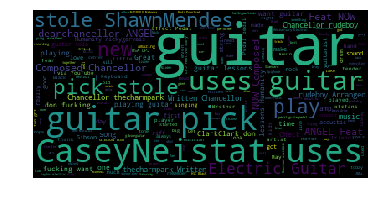

In [49]:
wordcloud = WordCloud().generate(' '.join(df0['cleaned']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [50]:
from collections import Counter

In [51]:
list(Counter(" ".join(df0['cleaned']).split(" ")).items())[:10]

[('', 4),
 ('Hoptille', 1),
 ('daders', 1),
 ('blnke', 1),
 ('jongen', 1),
 ('zwrte', 1),
 ('pet', 1),
 ('zwrt', 1),
 ('gekld', 1),
 ('lng', 1)]

In [52]:
fdist = list(Counter(" ".join(df0['cleaned']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(20)

,0,1
153,guitar,174
25,the,103
31,and,70
115,for,45
63,Guitar,45
440,Chancellor,32
510,this,27
156,from,26
347,that,26
60,out,24


In [193]:
vs = SentimentIntensityAnalyzer()

In [194]:
df2['score'] = df2['cleaned'].apply(lambda x: vs.polarity_scores(x)['compound'])
df2.head()

,id,created at,text,screen name,followers_count,friends_count,name,lat,lon,place name,place type,cleaned,words,score
0,1100517189461966848,Tue Feb 26 22:05:19 +0000 2019,@Applebees Pass https://t.co/JaeeGILRlV,MomRovin,3325,3248,Amy Rovin,NaN,NaN,NaN,NaN,Applebees Pass,"Applebees, Pass",0.0000
1,1100517447030005762,Tue Feb 26 22:06:20 +0000 2019,RT @ihatetherefs: What are y’all doing on date...,SPROTSTAKES,2138,1220,SPROTSTAKES,NaN,NaN,NaN,NaN,ihatetherefs What are all doing dates Haven yo...,"ihatetherefs, What, are, all, doing, dates, Ha...",0.0000
2,1100517449584193537,Tue Feb 26 22:06:21 +0000 2019,RT @_ericcurtin: waiting for the homies at app...,hooty_hooloo,93,272,anti-airpod enthusiast,NaN,NaN,NaN,NaN,ericcurtin waiting for the homies applebees,"ericcurtin, waiting, for, the, homies, applebees",0.0000
3,1100517525102694400,Tue Feb 26 22:06:39 +0000 2019,"RT @JesaidaKay: i want applebee’s :,)",alexxisniichole,180,100,lexxx,NaN,NaN,NaN,NaN,JesaidaKay want applebee,"JesaidaKay, want, applebee",0.0772
4,1100517718015574017,Tue Feb 26 22:07:25 +0000 2019,@Applebees Nobody wants to shit their pants in...,cassetteraised,917,205,raised by cassettes 🌮⚾️🎷,NaN,NaN,NaN,NaN,Applebees Nobody wants shit their pants their car,"Applebees, Nobody, wants, shit, their, pants, ...",-0.5574


In [195]:
df2["score"].mean()

0.08000119521912351

## Here we find that the overall sentiment of people tweeting about applebees is slightly positive!!

# Applebees Analysis

In [218]:
df['cleaned'] = df['tweets']
df.head()

,user,Unnamed: 1,time,tweets,cleaned,words
0,applebees,1.102250e+18,3/3/2019 16:34,@YFan914 We're sorry to hear this. Could you p...,@YFan914 We're sorry to hear this. Could you p...,"YFan, sorry, hear, this, Could, you, please, g..."
1,applebees,1.102130e+18,3/3/2019 8:49,@jarreyg Thanks for letting us know you would ...,@jarreyg Thanks for letting us know you would ...,"jarreyg, Thanks, for, letting, know, you, woul..."
2,applebees,1.102130e+18,3/3/2019 8:46,@rosieexomarie We're sorry if there was an iss...,@rosieexomarie We're sorry if there was an iss...,"rosieexomarie, sorry, there, was, issue, with,..."
3,applebees,1.102070e+18,3/3/2019 5:05,@kaleidoscopee__ Missing key ingredients on yo...,@kaleidoscopee__ Missing key ingredients on yo...,"kaleidoscopee, Missing, key, ingredients, your..."
4,applebees,1.102070e+18,3/3/2019 5:03,"@g_kern09 Hi Grant, we want to ensure our gues...","@g_kern09 Hi Grant, we want to ensure our gues...","kern, Grant, want, ensure, our, guests, are, h..."


In [219]:
df['cleaned'] = df.cleaned.str.replace('http\S+|www.\S+', '')

In [220]:
df['cleaned'] = df.cleaned.str.replace('\d+', '')

In [221]:
df['cleaned'] = df.cleaned.str.replace('[^a-zA-Z]+', ' ')

In [222]:
df['cleaned'] = df.cleaned.str.findall('\w{3,}').str.join(' ')

In [223]:
df['words'] = df['cleaned'].str.split()


In [224]:
df['words'] = df['words'].apply(', '.join)


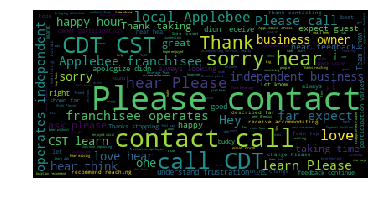

In [246]:
wordcloud = WordCloud().generate(' '.join(df['words']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [249]:
fdist = list(Counter(" ".join(df['cleaned']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(20)

,0,1
5,you,1217
55,the,660
13,for,633
85,here,602
166,contact,601
165,Please,597
46,and,480
41,your,479
159,that,462
25,our,461


In [250]:
df['score'] = df['words'].apply(lambda x: vs.polarity_scores(x)['compound'])
df.head()

,user,Unnamed: 1,time,tweets,cleaned,words,score
0,applebees,1.102250e+18,3/3/2019 16:34,@YFan914 We're sorry to hear this. Could you p...,YFan sorry hear this Could you please give cal...,"YFan, sorry, hear, this, Could, you, please, g...",0.2500
1,applebees,1.102130e+18,3/3/2019 8:49,@jarreyg Thanks for letting us know you would ...,jarreyg Thanks for letting know you would like...,"jarreyg, Thanks, for, letting, know, you, woul...",0.6597
2,applebees,1.102130e+18,3/3/2019 8:46,@rosieexomarie We're sorry if there was an iss...,rosieexomarie sorry there was issue with serve...,"rosieexomarie, sorry, there, was, issue, with,...",0.2960
3,applebees,1.102070e+18,3/3/2019 5:05,@kaleidoscopee__ Missing key ingredients on yo...,kaleidoscopee Missing key ingredients your bur...,"kaleidoscopee, Missing, key, ingredients, your...",0.2810
4,applebees,1.102070e+18,3/3/2019 5:03,"@g_kern09 Hi Grant, we want to ensure our gues...",kern Grant want ensure our guests are happy wi...,"kern, Grant, want, ensure, our, guests, are, h...",0.8442


In [252]:
df["score"].mean()

0.27027470588235536

## Here we find that Applebees tweets mostly positve things to its customers!

# 4. Storytelling

  After performing a word frequency and sentiment anlaysis on the two data sets I found some interesting things. The first thing that I found was that some frequently mentioned things that customers mentioned were homies which is slang for friends they also mentioned enjoy frequently which means that people who tweet about applebees tend to have a positve expirence. This was backed up by the sentiment analysis that I performed where it came out that customer tweets had an average positve sentment score. This implies that people who tweet about applebees tend to like the resturant. 
  
  
  Then I moved on to analyzing the tweets that applebees themselves send out. This was intersting because many of the tweets are responding to customer comments from the look of it. I found by looking at my wordcloud that applebees says thing like Sorry, please contact, and thank you wuite frequently. This is becasue many of the tweets are in response to customer tweets. After doing a sentiment analysis on the applebees tweets I found that applebees tweets out mostly positive things. This is to be expected because they want to leave a positve impression on their followers. Overall I enjoyed collecting and working with this data it was fun!!!



On my honor, as a student, I have neither given nor received unauthorized aid on this academic work

In [1]:
!pip install pyLDAvis

  Running setup.py bdist_wheel for pyLDAvis: started
  Running setup.py bdist_wheel for pyLDAvis: finished with status 'done'
  Stored in directory: C:\Users\brian\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
from IPython.display import Image
Image("data/bigdata.png")